In [1]:
from scipy.stats import spearmanr, percentileofscore
import numpy as np
import pylab as plt
from tqdm import tqdm,trange
import pandas as pd

In [2]:
samples = 1000
x = np.random.random(samples)
y = np.random.random(samples)
inds = x>y
x = x[inds]
y = y[inds]

sort_inds = np.argsort(x)
x = x[sort_inds]
y = y[sort_inds]

corr_val = spearmanr(x,y)

Text(0.5, 1.0, 'SpearmanrResult(correlation=0.4323073187852995, pvalue=1.49925720472485e-23)')

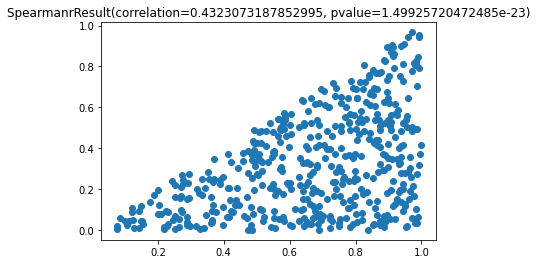

In [3]:
plt.scatter(x,y);
plt.title(corr_val)

## Shuffle lower bound 1

At a minimum, we can try to say that the relationship is/is not completely random <br> For each x_i, generate a y_i such that 1) x_i > y_i, and 2) y_i <= y_max <br> This should return to us a distribution that is purely sequential within the bounds of the given data 

In [12]:
def gen_shuffle(x):
    return np.array([np.random.uniform(0, this_x) for this_x in x])

In [17]:
shuffle_count = 10000
shuffle_stack = np.stack([gen_shuffle(x) for i in trange(shuffle_count)])
shuffle_corrs = [spearmanr(x,this_y) for this_y in tqdm(shuffle_stack)]
shuffle_rho = [x[0] for x in shuffle_corrs]
shuffle_pval = [x[1] for x in shuffle_corrs]

100%|██████████| 10000/10000 [00:04<00:00, 2114.22it/s]


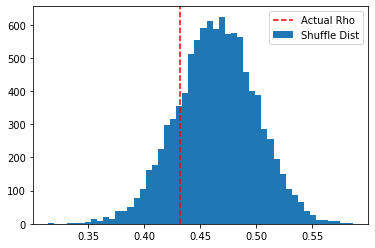

In [20]:
plt.hist(shuffle_rho, bins = 50, label = 'Shuffle Dist')
plt.axvline(corr_val[0], color = 'red', linestyle = '--', label = 'Actual Rho')
plt.legend()

## Shuffle upper bound

Another lower bound we can test is that increasing x simply pushes the RANGE of y <br>
i.e. y will happen in a range after x, regardless of where x is <br>
For each x_i, generate a y_i such that 1) x_i > y_i, and 2) y_i <= x_i + y_range <br>
Where y_range is the mean/median/max value for x_i - y_i
This should return to us a distribution that is purely sequential but not strictly upper bounded by a value

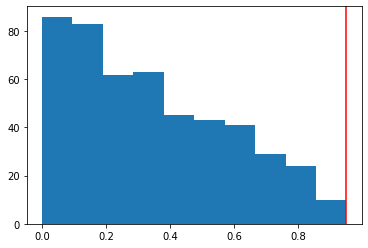

In [30]:
y_range = np.max(x-y)
plt.hist(x-y);
plt.axvline(y_range, color = 'red')

In [31]:
def gen_shuffle(x, y_range):
    return np.array([np.random.uniform(this_x - y_range, this_x) for this_x in x])

In [32]:
shuffle_count = 1000
shuffle_stack = np.stack([gen_shuffle(x, y_range) for i in trange(shuffle_count)])
shuffle_corrs = [spearmanr(x,this_y) for this_y in tqdm(shuffle_stack)]
shuffle_rho = [x[0] for x in shuffle_corrs]
shuffle_pval = [x[1] for x in shuffle_corrs]


100%|██████████| 1000/1000 [00:01<00:00, 751.90it/s][A

100%|██████████| 1000/1000 [00:00<00:00, 2059.37it/s][A


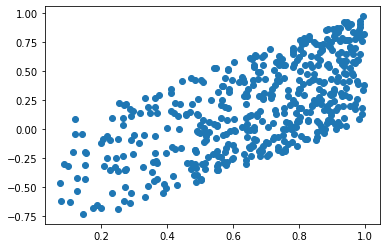

In [33]:
plt.scatter(x, shuffle_stack[0])

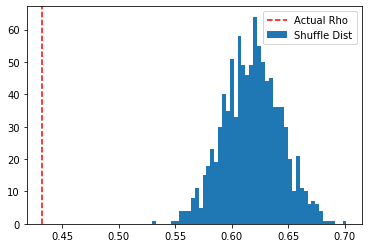

In [34]:
plt.hist(shuffle_rho, bins = 50, label = 'Shuffle Dist')
plt.axvline(corr_val[0], color = 'red', linestyle = '--', label = 'Actual Rho')
plt.legend()

## Shuffle Test

In [5]:
# Fort each x, grab a random y that obeys the comparison logic (i.e. x>y or x<y)

In [6]:
shuffle_count = 10000

In [7]:
# Generate 1 shuffle dataset
def generate_ordered_shuffle(x,y):
 return np.array([np.random.choice(y[x_val > y]) for x_val in x])

In [13]:
shuffle_stack = np.stack([generate_ordered_shuffle(x,y) for i in trange(shuffle_count)])
shuffle_corrs = [spearmanr(x,this_y) for this_y in tqdm(shuffle_stack)]
shuffle_rho = [x[0] for x in shuffle_corrs]
shuffle_pval = [x[1] for x in shuffle_corrs]

100%|██████████| 10000/10000 [00:04<00:00, 2138.23it/s]


In [15]:
alpha = 0.05
np.mean(np.array(shuffle_pval)<alpha)

1.0

In [127]:
# Plot all generated datapoints to detect strong biases
x_mat = np.broadcast_to(x, shuffle_stack.shape)

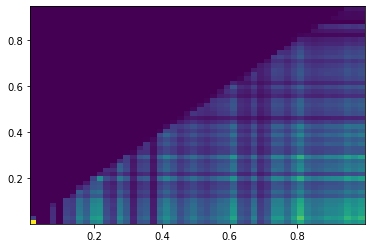

In [128]:
plt.hist2d(x_mat.flatten(), shuffle_stack.flatten(),bins = 50);

In [131]:
percentileofscore(shuffle_rho,corr_val[0])

99.99

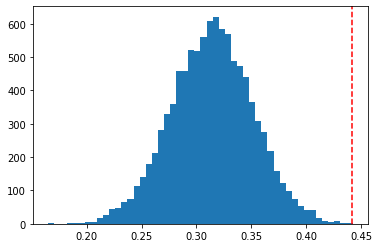

In [129]:
plt.hist(shuffle_rho, bins = 50)
plt.axvline(corr_val[0], color = 'red', linestyle = '--')

## Shuffling inside bins

In [16]:
# Bin x
# Real data --> calculate correlations with binned x vs y
# Shuffle data --> calculate correlation with binned x vs intra-bin shuffled y

In [18]:
dataframe = pd.DataFrame(dict(x=x,y=y))

In [53]:
bins = 4
dataframe['xbin'] = pd.cut(dataframe['x'], bins = bins, labels = range(bins))

In [54]:
spearmanr(dataframe['xbin'], dataframe['y'])

SpearmanrResult(correlation=0.4348710353215442, pvalue=2.6671477135567285e-24)

<AxesSubplot:xlabel='x', ylabel='y'>

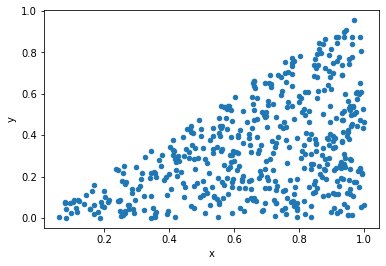

In [55]:
dataframe.plot.scatter('x','y')

In [56]:
# Intra-bin-shuffle
shuffle_frame = pd.DataFrame(dict(
        x = dataframe.groupby('xbin')['x'].sample(frac=1).reset_index(drop=True),
        y = dataframe.groupby('xbin')['y'].sample(frac=1).reset_index(drop=True)
))

<AxesSubplot:xlabel='x', ylabel='y'>

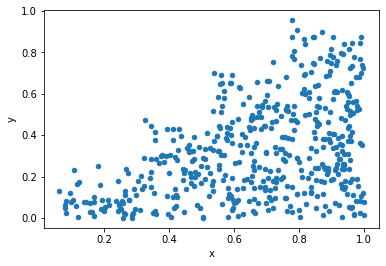

In [57]:
shuffle_frame.plot.scatter('x','y')

In [ ]:
## Generate samples

In [58]:
from sklearn.linear_model import LinearRegression

In [61]:
LinearRegression().fit(x[:,np.newaxis],y).score(x[:,np.newaxis],y)

0.20931633318879594